In [93]:
#Import modules
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels as statsmd

# Modules for modelling
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier



In [94]:
# Load the datset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Understanding The Data

* This section tries to understand the data and determine if there is a pattern in churned customers versus customers that have not churned 

In [95]:
#Checking the columns and rows
print("The dataset has {} columns and {} rows".format(df.shape[0], df.shape[1]))


The dataset has 3333 columns and 21 rows


In [96]:
#A succinct statistical summary of numerical attributes.
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [98]:
def col_info(data):
    """
    This function provides a summary of the column data types.
    """

    col_names = data.columns
    num_cols = data.select_dtypes(int).columns
    cat_cols = data.select_dtypes(object).columns
    boolean_cols = data.select_dtypes(bool).columns
    float_cols = data.select_dtypes(float).columns
    shape = data.shape

    print('col_names: \n', col_names)
    print('=====================================================================================')
    print('=====================================================================================')
    print('num_cols: \n', num_cols)
    print('=====================================================================================')
    print('=====================================================================================')
    print('cat_cols: \n', cat_cols)
    print('=====================================================================================')
    print('=====================================================================================')
    print('boolean_cols: ', boolean_cols)
    print('=====================================================================================')
    print('=====================================================================================')
    print('float_cols: \n', float_cols)
    print('=====================================================================================')
    print('=====================================================================================')
    print('The shape: ', shape)
    print('=====================================================================================')
    print('=====================================================================================')
    print(f"There are {len(num_cols)} numeric type columns, {len(cat_cols)} object type columns, and {len(float_cols)} float type columns out of {shape[1]}")


In [99]:
col_info(df)

col_names: 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
num_cols: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
boolean_cols:  Index(['churn'], dtype='object')
float_cols: 
 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total ni

In [100]:
#Checking for duplicates and missing data
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [101]:
cleaning(df)

"There are '0' missing values and '0' duplicated values in the dataset"

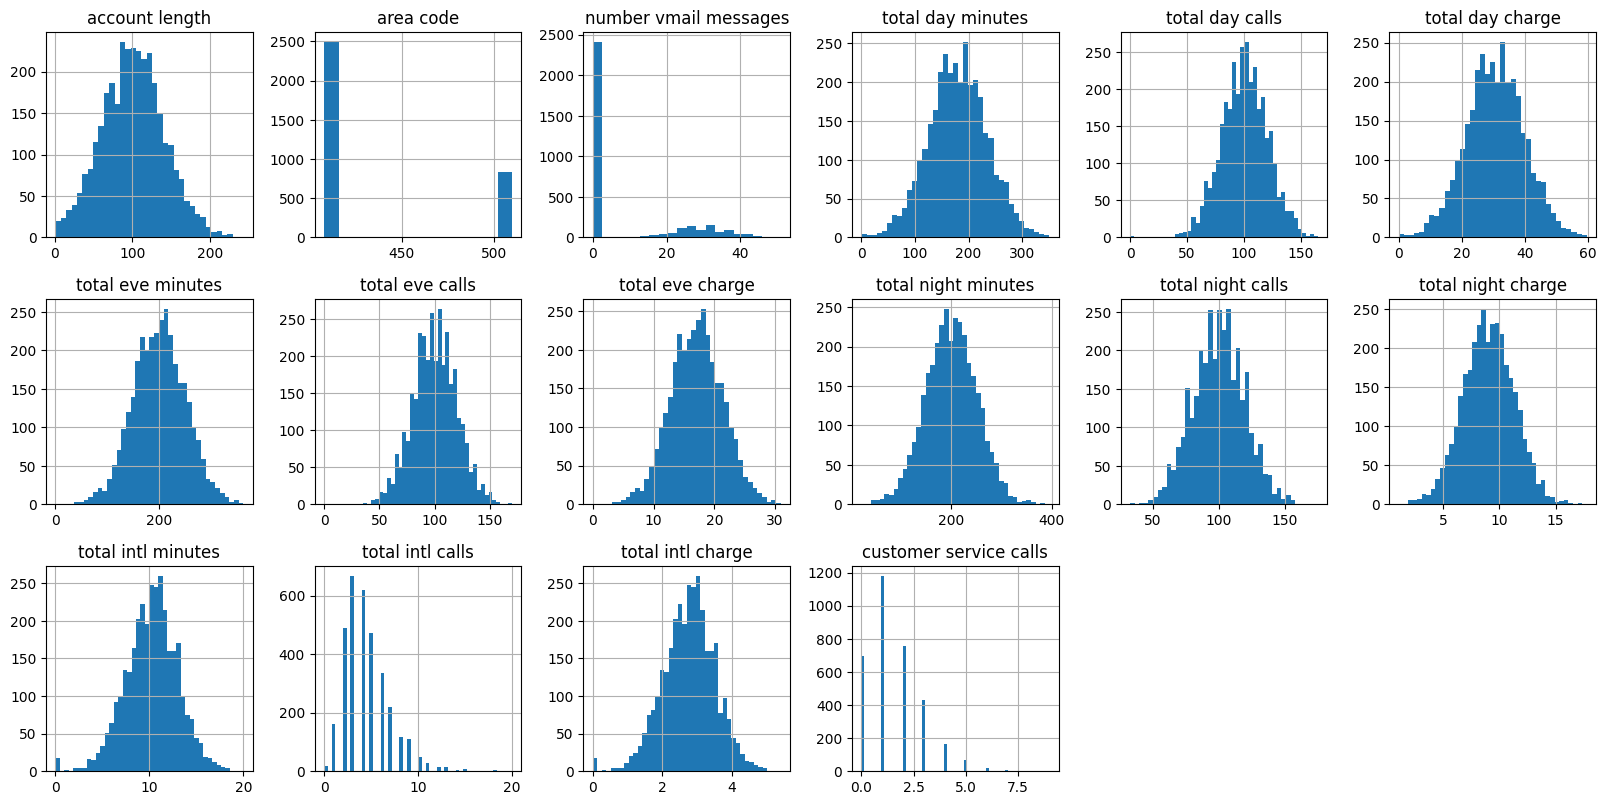

In [102]:
# Check data distribution
df.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
plt.show()

* Based on the preceding cell, we can observe the presence of both categorical and numerical features. The numerical features, such as account length and the various totals (e.g., total day calls, total international calls, and total night charges), appear to follow a normal distribution.

* Additionally, there are categorical features such as area code and voice mail messages. To handle these features as numerical data, they can be encoded using techniques like binary encoding or one-hot encoding.

#### Looking at the dataset, there are unnecessary columns such as phone numbers which can be dropped for decongestion


In [103]:
df.drop('phone number', axis=1, inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Explanatory Data Analysis (EDA)

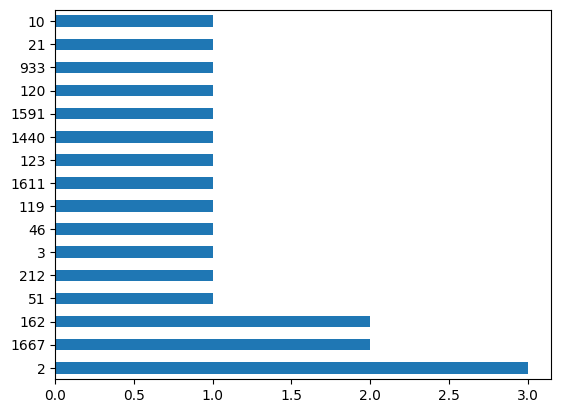

In [104]:
# unique entries visualization
df.nunique().value_counts().plot.barh();


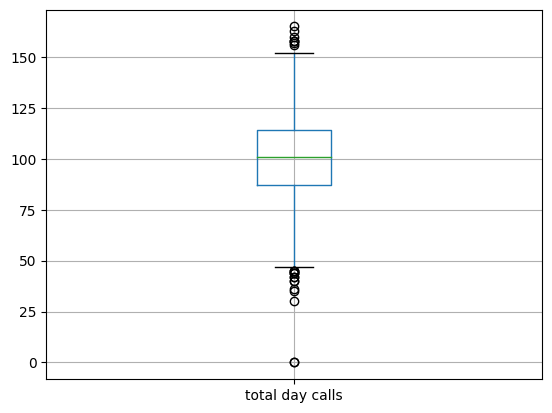

In [105]:
# Check for Outliers
df.boxplot('total day calls')
plt.show()

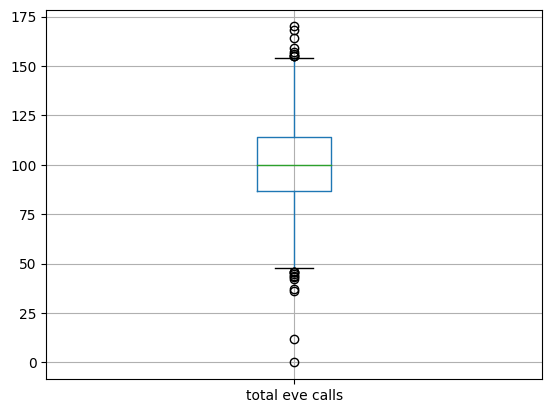

In [106]:
df.boxplot('total eve calls')
plt.show()

<Axes: >

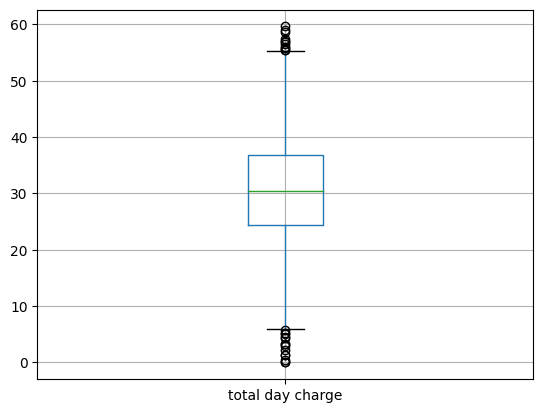

In [107]:
df.boxplot('total day charge')

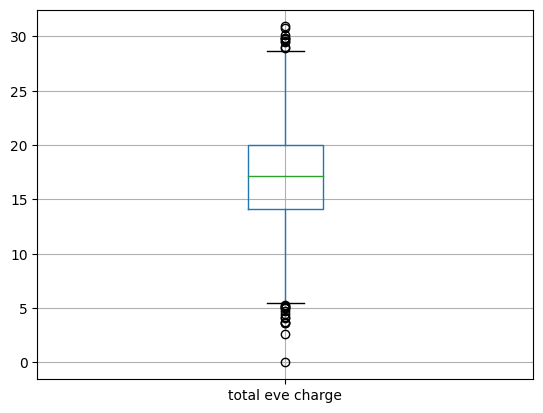

In [108]:
df.boxplot('total eve charge')
plt.show()

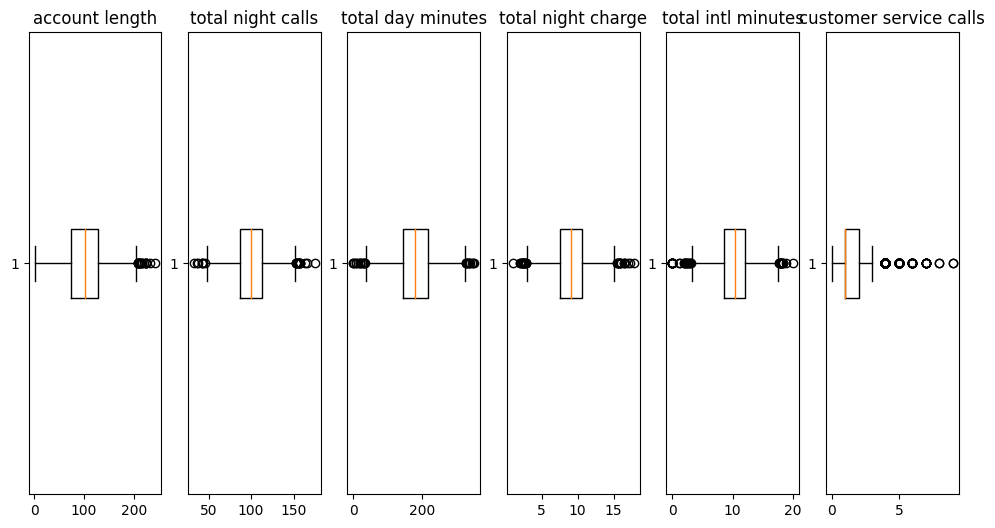

In [109]:
num_cols = ["account length", "total night calls", "total day minutes", "total night charge","total intl minutes", "customer service calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)

plt.show()

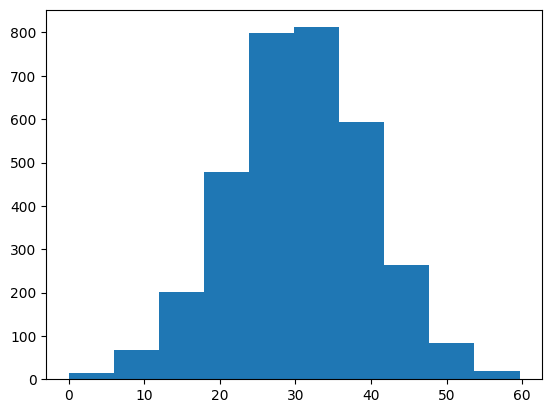

In [110]:
# Viewing relationships between Churn and other columns
plt.hist(df['total day charge'], bins=10)
# plt.xlabel('Column Name')
# plt.ylabel('Frequency')
# plt.title('Histogram of Column Name')
plt.show()

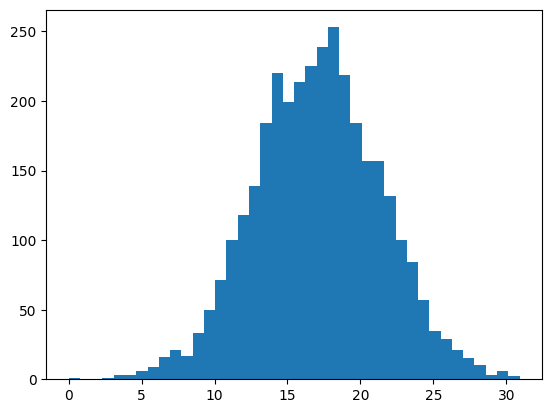

In [111]:
plt.hist(x=df['total eve charge'], bins='auto');

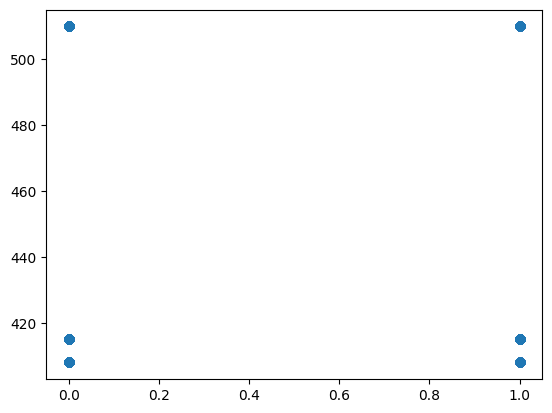

In [112]:
plt.scatter(x=df['churn'], y= df['area code']);

The above relationship shows a possibility of a one hot encoding

<Axes: xlabel='international plan', ylabel='count'>

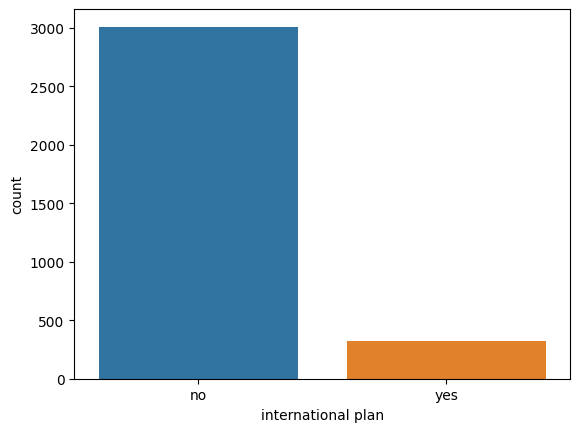

In [113]:
sns.countplot(data=df, x='international plan')

* In this analysis, the dependent variable used will be churn.

* Churn refers to the termination of a customer's contract with SyriaTel. A value of "True" indicates termination, while "False" indicates the
customerstill has an existing account.

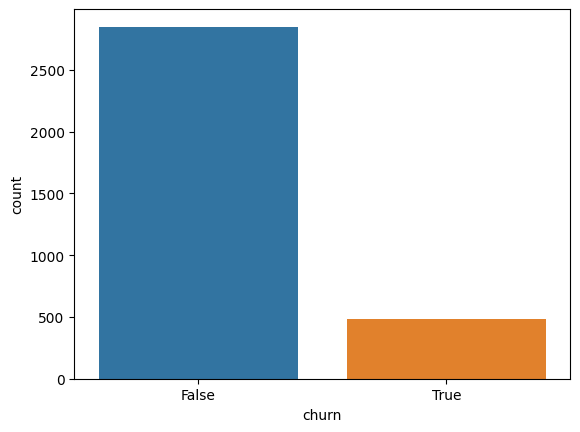

In [114]:
sns.countplot(data=df, x='churn');

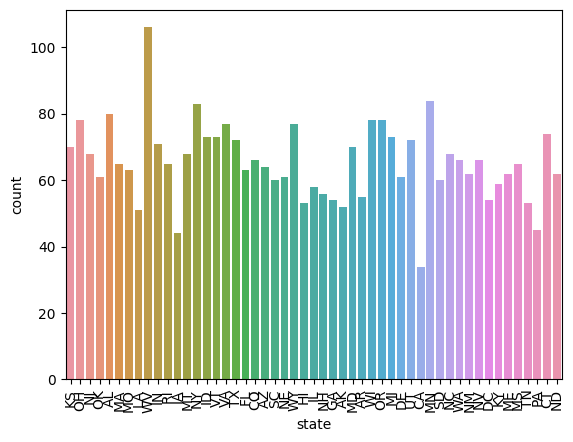

In [115]:
sns.countplot(data=df, x='state')
plt.xticks(rotation=90);

/tmp/ipykernel_5450/3912557179.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_corr = df.corr()['churn']


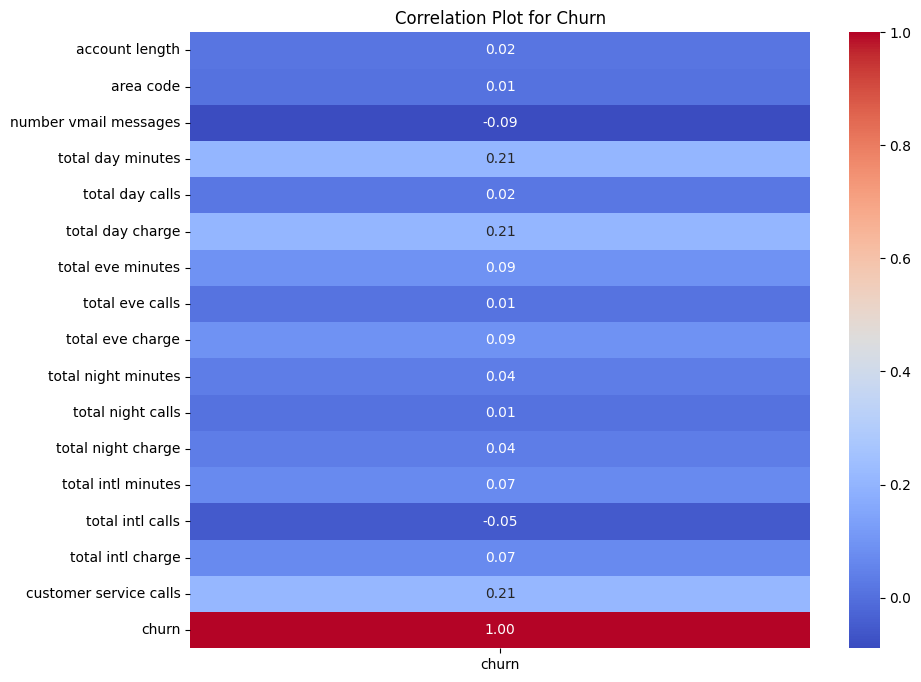

In [116]:
# Conducting a correlation analysis with the churn variable.
churn_corr = df.corr()['churn']


plt.figure(figsize=(10, 8))
sns.heatmap(churn_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Churn')
plt.show()

* Based on the displayed visualization, it is evident that customer service calls, total day minutes, and total day charge exhibit the strongest correlation with churn, with a correlation coefficient of 0.21.

In [117]:
df['churn'] = df['churn'].replace({True: 1, False: 0}).astype(int)
df['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [118]:
print("Relationship between account length and churn:")
print(df.groupby("churn")["account length"].describe())

Relationship between account length and churn:
        count        mean       std  min   25%    50%    75%    max
churn                                                              
0      2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
1       483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0


In [119]:
# One-hot-encoding some categorical columns
# Area code
df = pd.get_dummies(df, columns=['area code'], drop_first=True)

# Performing binary encoding on the remaining categorical columns.
# Voicemail
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# International Plan
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})

In [120]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_415,area code_510
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,...,279.1,83,12.56,9.9,6,2.67,2,0,1,0
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,...,191.3,123,8.61,9.6,4,2.59,3,0,1,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,...,191.9,91,8.64,14.1,6,3.81,2,0,0,1
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,...,139.2,137,6.26,5.0,10,1.35,2,0,0,1


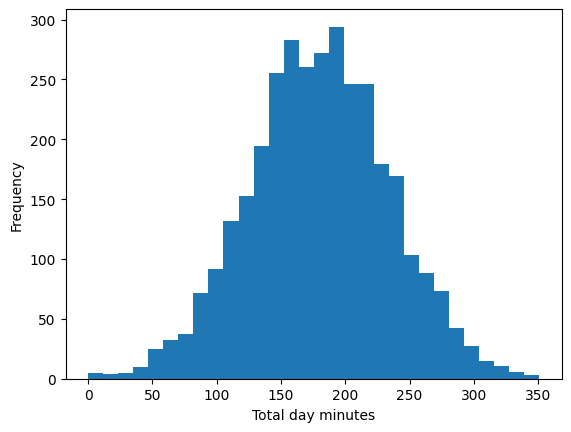

In [121]:
plt.hist(df['total day minutes'], bins=30)
plt.xlabel('Total day minutes')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_5450/3195579909.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


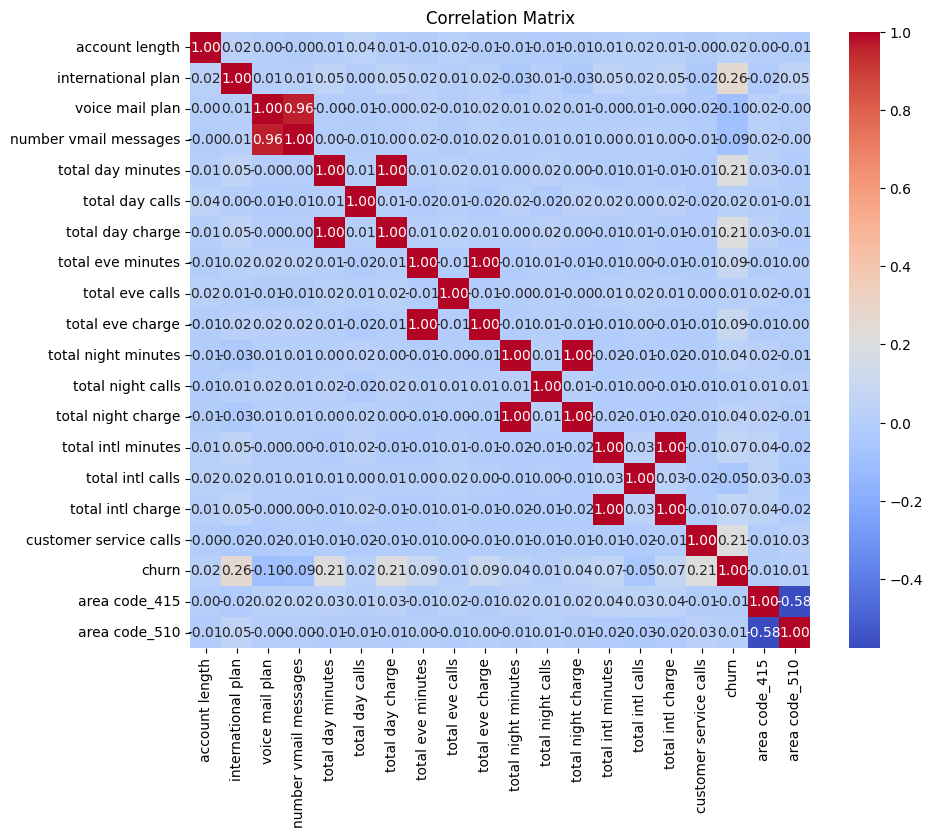

In [122]:
# Checking for correlation

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* The majority of features in the dataset show no correlation, but there are some that exhibit a perfect correlation.

    * The features "Total day charge" and "Total day minutes" have a complete positive correlation.
    * Likewise, the features "Total eve charge" and "Total eve minutes" show a complete positive correlation.
    * The features "Total night charge" and "Total night minutes" are also fully positively correlated.
    
* Finally, the features "Total int charge" and "Total int minutes" demonstrate a complete positive correlation.

* This perfect correlation is reasonable since the charge amount is directly influenced by the number of minutes used. 
* A correlation coefficient of 1 indicates the presence of perfect multicollinearity. However, the impact of perfect multicollinearity differs between linear and nonlinear models. While linear models are significantly affected, some nonlinear models may be impacted, while others are not.

## Modeling

###  Baseline Model

In [123]:
X = df.drop(['churn', 'state'], axis=1)
y = df['churn']

# Perform a train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=132)


In [124]:
# Sunthetic Minority Oversampling Technique
sm = SMOTE()

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = sm.fit_resample(X_test, y_test)

In [125]:
print(pd.Series(y_train).value_counts())

print(pd.Series(y_train_resampled).value_counts())

print(pd.Series(y_test).value_counts())

print(pd.Series(y_test_resampled).value_counts())

0    2007
1     326
Name: churn, dtype: int64
0    2007
1    2007
Name: churn, dtype: int64
0    843
1    157
Name: churn, dtype: int64
1    843
0    843
Name: churn, dtype: int64


In [126]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)


In [127]:
def modelling(model):
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resampled
    y2 = y_test_resampled
    
    base_cv = cross_val_score(model, X_train_scaled, y_train_resampled)
    
    fitting = model.fit(X1,y1)
    predicting = model.predict(X2)
    scoring = model.score(X2, y2)
    model_cv = cross_val_score(model, X1, y1)
    model_report = classification_report(y2, predicting)
    model_roc_auc = roc_auc_score(y2, predicting)
    
    print("Score:")
    print("\t",scoring)
    print("\nCross validation:")
    print("\t",model_cv)
    print("\nClass report:")
    print(model_report)
    print("\nROC_AUC:")
    print("\t",model_roc_auc)


### 1. Logistic Regression

In [128]:
base_model = LogisticRegression(random_state=132)

modelling(base_model)

Score:
	 0.7734282325029656

Cross validation:
	 [0.69489415 0.79078456 0.77210461 0.77708593 0.74937656]

Class report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       843
           1       0.76      0.80      0.78       843

    accuracy                           0.77      1686
   macro avg       0.77      0.77      0.77      1686
weighted avg       0.77      0.77      0.77      1686


ROC_AUC:
	 0.7734282325029656


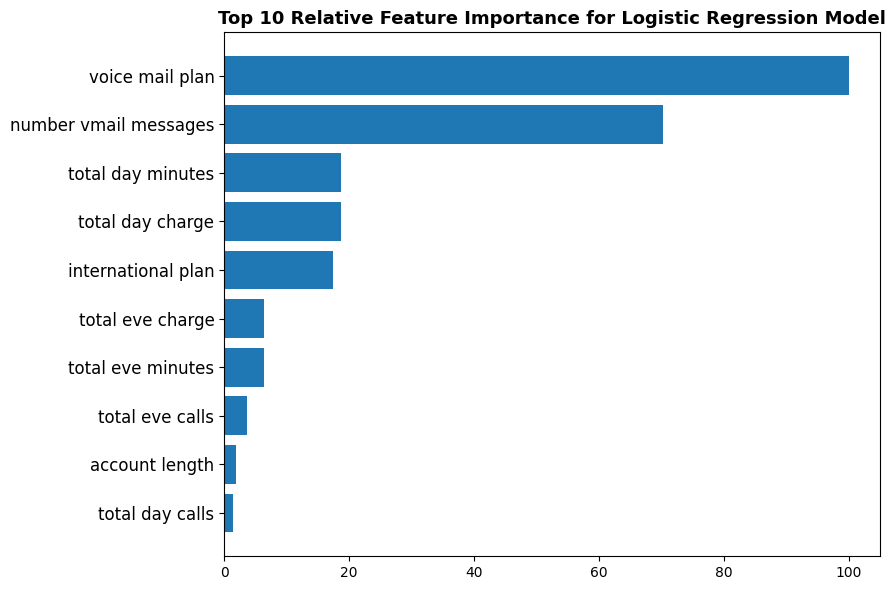

In [129]:
#Feature importance
feature_importance = abs(base_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

#Visualizing feature importance
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Top 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()


In [130]:
def conf_matrix(model):
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resampled
    y2 = y_test_resampled
    
    predicting = model.predict(X2)
    
    dis_estimator = ConfusionMatrixDisplay.from_estimator(model, X1, y1)
    dis_predictor = ConfusionMatrixDisplay.from_predictions(y2, predicting)
    
    return dis_estimator, dis_predictor

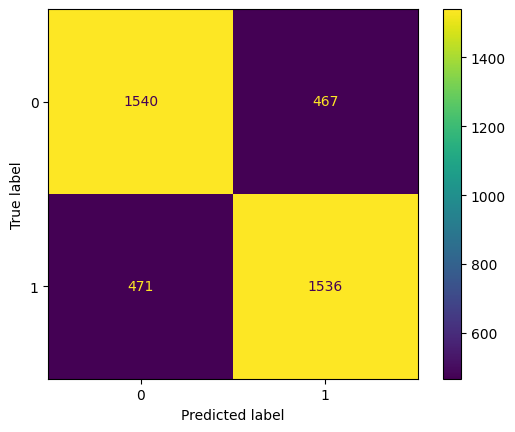

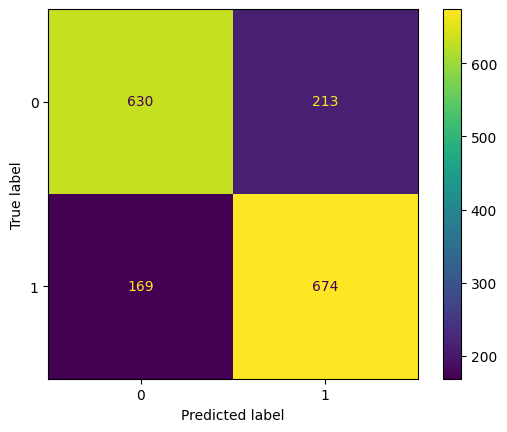

In [131]:
conf_matrix(base_model);

### 2. GridSearch

In [132]:
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=132))])

# Create the grid parameter
grid = [{'tree__max_depth': [None, 2, 6, 10], 
         'tree__min_samples_split': [5, 10]}]


# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

In [133]:
modelling(gridsearch)

Score:
	 0.7645314353499407

Cross validation:
	 [0.85803238 0.84184309 0.8630137  0.86052304 0.86658354]

Class report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       843
           1       0.81      0.68      0.74       843

    accuracy                           0.76      1686
   macro avg       0.77      0.76      0.76      1686
weighted avg       0.77      0.76      0.76      1686


ROC_AUC:
	 0.7645314353499406


### 3. Random Forest

In [134]:
clf = RandomForestClassifier(n_estimators=4, random_state=132)

modelling(clf)

Score:
	 0.7924080664294187

Cross validation:
	 [0.85678705 0.90909091 0.88542964 0.89912827 0.90773067]

Class report:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       843
           1       0.93      0.63      0.75       843

    accuracy                           0.79      1686
   macro avg       0.82      0.79      0.79      1686
weighted avg       0.82      0.79      0.79      1686


ROC_AUC:
	 0.7924080664294186


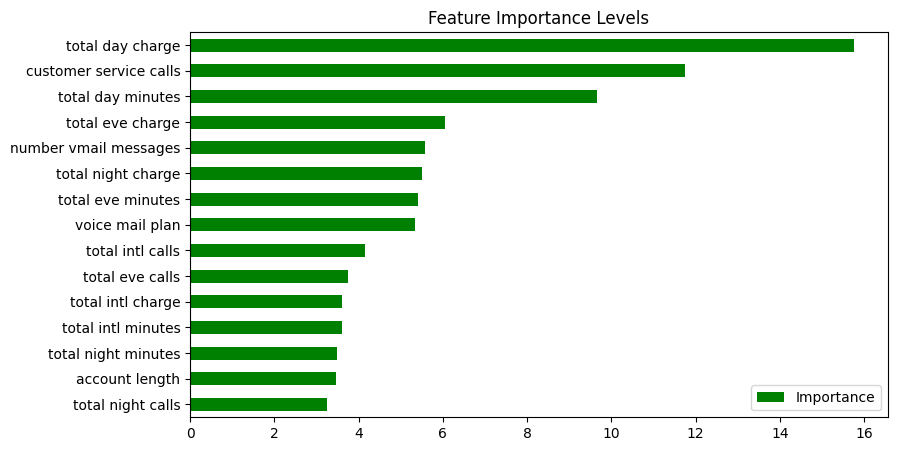

In [135]:
importance = pd.DataFrame({"Importance": clf.feature_importances_ * 100}, index=X_train.columns)
sorted_importance = importance.sort_values(by="Importance", axis=0, ascending=True).tail(15)
sorted_importance.plot(kind="barh", color="g", figsize=(9, 5))
plt.title("Feature Importance Levels")
plt.show()


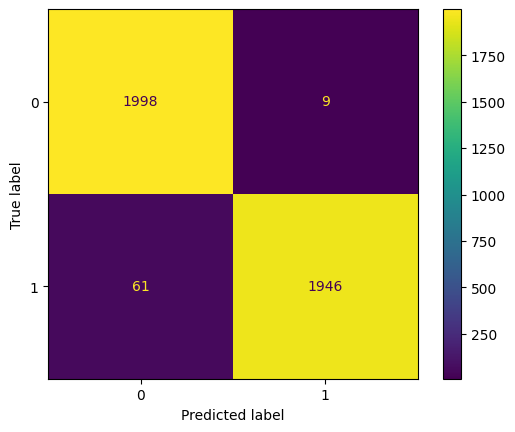

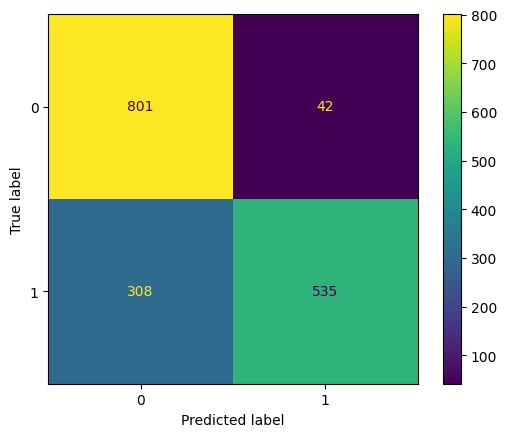

In [136]:
#confusion matrix
conf_matrix(clf);

The random forest classifier indicates that the features with the greatest impact on the model are the total day charge, customer service calls, and the presence of an "international plan."

The model exhibits significantly higher accuracy and F1 score, indicating positive progress.

### 4. KNN Model

In [137]:
knn = KNeighborsClassifier(n_neighbors=4)

modelling(knn)

Score:
	 0.7277580071174378

Cross validation:
	 [0.85927771 0.90660025 0.91780822 0.89788294 0.89401496]

Class report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       843
           1       0.80      0.60      0.69       843

    accuracy                           0.73      1686
   macro avg       0.74      0.73      0.72      1686
weighted avg       0.74      0.73      0.72      1686


ROC_AUC:
	 0.7277580071174378


## Comparing Models

### ROC Curve

/home/moringa/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_5450/221831601.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': cls.__class__.__name__,
/tmp/ipykernel_5450/221831601.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': cls.__clas

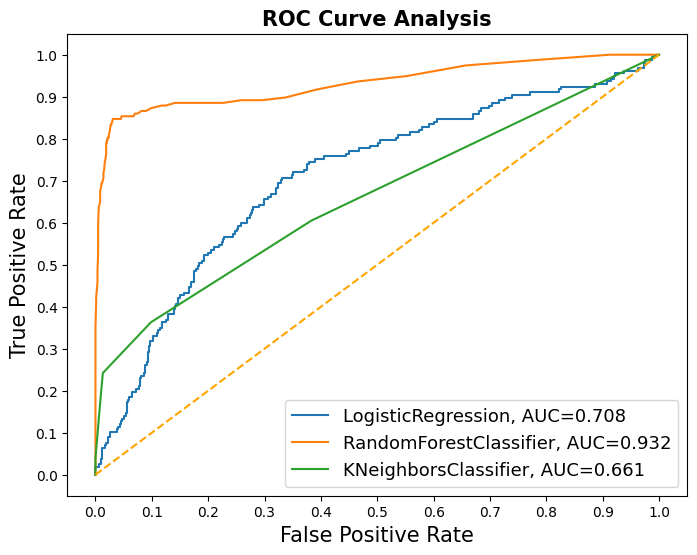

In [139]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               KNeighborsClassifier()]

# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)

# Set the classifiers' names as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()


* The ROC curve showcases the relationship between the true positive rate and the false positive rate of our classifier.

* Optimal models will exhibit a curve that closely follows the upper left section of the graph, as is the case with the random forest classifier, indicating superior performance.

## Conclusion

After analyzing the ROC curves presented above, it is evident that the Random Forest model outperforms the other two models. 

The ROC curve of the Random Forest model is positioned closer to the top-left corner, indicating superior performance. This 

model also showcases the highest area under the curve (AUC), suggesting its superior ability to distinguish between positive 

and negative classes. The Random Forest model achieves a higher true positive rate and a lower false positive rate, 

indicating a better balance between sensitivity and specificity. Consequently, the Random Forest model is the most effective 

and reliable option for predicting the target variable in this particular scenario.